<a href="https://colab.research.google.com/github/GabrielYamaya/Data-Warehouse-Teste/blob/main/DataWarehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código para montar DataWarehouse


In [1]:
import pandas as pd
import numpy as np

# Função para criar um conjunto de dados aleatórios com 600 itens para a tabela de produtos.
num_produtos = 600
produtos = {
    'produto_id': range(1, num_produtos + 1),
    'nome': [f'Produto {i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Atribuição dos dados de produtos gerados para um Data Frame
df_produtos = pd.DataFrame(produtos)

# Função para criar um conjunto de dados aleatórios com 1000 itens para a tabela de vendas.
num_vendas = 1000
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-10', periods=30), num_vendas),  # Gera aleatoriamente os periodos entre a data de 10 de abril de 2024
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),  # Gera IDs de produtos aleatórios dentro do intervalo definido
    'quantidade': np.random.randint(50, 200, num_vendas),  # Gera quantidades aleatórias de produtos vendidos
    'valor_total': np.random.randint(1000, 10000, num_vendas)  # Gera valores totais aleatórios para as vendas
}

# Atribuição dos dados de vendas gerados para um Data Frame
df_vendas = pd.DataFrame(data_vendas)

# Converte os Data Frames em arquivos .csv
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

# Abre os arquivos .csv dentro do código
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

# Mescla as duas tabelas com base no ID
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Cria o Data Warehouse que é o arquivo .csv resultante da última etapa (união de tabelas)
df_merge.to_csv('data_warehouse.csv', index=False)

# Abre o Data Warehouse dentro do código e printa na tela as informações contidas nele
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteudo do Data Warehouse:")
print(df_warehouse)

Conteudo do Data Warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-15           7         190         4372    Produto 7       Roupas
1    2024-05-07           7         175         5327    Produto 7       Roupas
2    2024-05-01         350          57         1871  Produto 350       Roupas
3    2024-04-10         350         134         4157  Produto 350       Roupas
4    2024-04-27         145         168         6930  Produto 145    Alimentos
..          ...         ...         ...          ...          ...          ...
995  2024-05-07         496          52         5643  Produto 496    Alimentos
996  2024-04-22         472         147         3353  Produto 472    Alimentos
997  2024-05-06         391         155         7393  Produto 391       Roupas
998  2024-04-14         116         150         1706  Produto 116  Eletrônicos
999  2024-05-08         206          94         1855  Produto 206  Eletrônicos

[1000 rows x 6 columns]

Código para trabalhar com o DataWarehouse

Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 1           194         7151
Produto 10          561        26039
Produto 102         319        11455
Produto 103         170         1843
Produto 104          66         4554
...                 ...          ...
Produto 95          498        21255
Produto 96          155         1919
Produto 97          178        13169
Produto 98          244         9359
Produto 99          234         4341

[493 rows x 2 columns]

Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         40933      1826883
Eletrônicos       35399      1663791
Roupas            47107      2059225

Analise de tendencias temporais:
            quantidade  valor_total
data                               
2024-04-10        3913       184877
2024-04-11        3796       187085
2024-04-12        3419       158267
2024-04-13        45

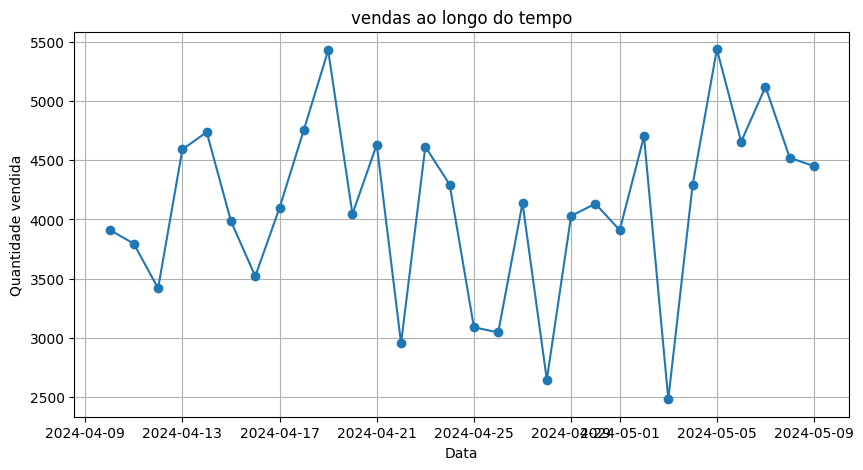


Analise de desempenho de produtos:
nome
Produto 1       7151
Produto 10     26039
Produto 102    11455
Produto 103     1843
Produto 104     4554
               ...  
Produto 95     21255
Produto 96      1919
Produto 97     13169
Produto 98      9359
Produto 99      4341
Name: valor_total, Length: 493, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Abre o Data Warehouse dentro do código
df_warehouse = pd.read_csv('data_warehouse.csv')

# Aloca o valor de "quantidade" e de "valor total" do Data Warehouse em um Data Frame agrupando pelo nome e depois printa na tela o resultado
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade','valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Aloca o valor de "quantidade" e de "valor total" do Data Warehouse em um Data Frame agrupando pela categoria e depois printa na tela o resultado
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade','valor_total']].sum()
print("\nAnálise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Converte os valores da coluna "data" para valores do tipo data
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])

# Aloca o valor de "quantidade" e de "valor total" do Data Warehouse em um Data Frame agrupando pela data e depois printa na tela o resultado
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnalise de tendencias temporais:")
print(vendas_por_data)

# Gera um gráfico de linha que mostra o número de vendas pela data
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade vendida')
plt.grid(True)
plt.show()

# Calcula e mostra o desempenho de cada um produtos somando o valor total das vendas de cada um.
# Aloca o valor de "valor total" do Data Warehouse em um Data Frame agrupando pelo nome e depois printa na tela o resultado
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnalise de desempenho de produtos:")
print(desempenho_produto)